In [4]:
import pandas


def filter(data: pandas.DataFrame):
    data = data.filter(["FLT_DATE", "APT_ICAO", "APT_NAME", "STATE_NAME", "FLT_ARR_1"])
    data = data.rename(columns={"FLT_DATE": "date", 
                                "APT_ICAO": "code", 
                                "APT_NAME": "city", 
                                "STATE_NAME": "country", 
                                "FLT_ARR_1": "arrivals"})

    data = data.drop(data[data['country'] != 'Poland'].index)

    data_arrival_dict = dict()

    for index, row in data.iterrows():
        date = row['date'][0:10]
        arrivals = row["arrivals"]
        if date in data_arrival_dict:
            data_arrival_dict[date] += arrivals
        else:
            data_arrival_dict[date] = arrivals

    df = pandas.DataFrame(data_arrival_dict.items(), columns=['date', 'arrivals'])
    df['date'] = pandas.to_datetime(df['date'])

    return df
    
    

,date,code,city,country,arrivals
28,2021-01-01T00:00:00Z,EPWA,Warszawa/ Chopina,Poland,49
37,2021-01-01T00:00:00Z,EPPO,Poznan - Lawica,Poland,5
58,2021-01-01T00:00:00Z,EPLB,Lublin,Poland,1
83,2021-01-01T00:00:00Z,EPGD,Gdansk,Poland,12
117,2021-01-01T00:00:00Z,EPWR,Wroclaw/ Strachowice,Poland,7
...,...,...,...,...,...
82670,2021-10-31T00:00:00Z,EPLB,Lublin,Poland,3
82675,2021-10-31T00:00:00Z,EPZG,Zielona Gora - Babimost,Poland,1
82682,2021-10-31T00:00:00Z,EPSY,Olsztyn-Mazury,Poland,1
82689,2021-10-31T00:00:00Z,EPWR,Wroclaw/ Strachowice,Poland,30


<AxesSubplot:xlabel='date'>

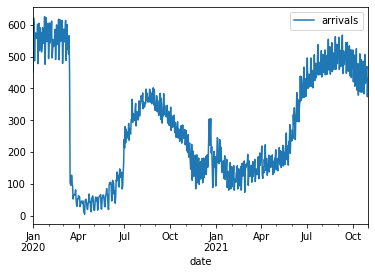

In [6]:
data2020 = filter(pandas.read_csv('raw_data/raw_arrivals_data/arrivals_2020.csv'))
data2021 = filter(pandas.read_csv('raw_data/raw_arrivals_data/arrivals_2021.csv'))

# data2020.append(data2021, ignore_index=True).to_csv("arrivals-per-day.csv")

data = data2020.append(data2021, ignore_index=True)



data.plot(x = 'date', y = 'arrivals')